In [1]:
!pip install opendatasets -q

In [2]:
import opendatasets as od

In [3]:

path='https://www.kaggle.com/datasets/msambare/fer2013'

In [4]:
od.download(path)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abhishek001chawla
Your Kaggle Key: ··········


100%|██████████| 60.3M/60.3M [00:02<00:00, 29.2MB/s]


In [5]:
import os

In [6]:
os.listdir

<function posix.listdir(path=None)>

In [7]:
data_dir='/content/fer2013'

In [8]:
data_dir

'/content/fer2013'

In [9]:
sample_train={}
sample_test={}
for items in os.listdir(data_dir):
  item_path=os.path.join(data_dir,items)
  if os.path.isdir(item_path):
    for emotion in os.listdir(item_path):
      emotion_path=os.path.join(item_path,emotion)
      if items=='train':
        sample_train[emotion]=len(os.listdir(emotion_path))
      else:
        sample_test[emotion]=len(os.listdir(emotion_path))

In [10]:

sample_train

{'neutral': 4965,
 'disgust': 436,
 'angry': 3995,
 'sad': 4830,
 'surprise': 3171,
 'fear': 4097,
 'happy': 7215}

In [11]:

sample_test

{'neutral': 1233,
 'disgust': 111,
 'angry': 958,
 'sad': 1247,
 'surprise': 831,
 'fear': 1024,
 'happy': 1774}

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Acceptable Image Extensions: jpeg,jpg and png

In [14]:
image_ext=['jpeg','jpg','png']

In [15]:
#Making a new directory

In [16]:
project='Emotion'
base_dir='/content/'
project_dir=os.path.join(base_dir,project)
os.makedirs(project_dir,exist_ok=True)

In [17]:
train_dir=os.path.join(data_dir,'train')

In [18]:
test_dir=os.path.join(data_dir,'test')

In [19]:
os.listdir(test_dir)

['neutral', 'disgust', 'angry', 'sad', 'surprise', 'fear', 'happy']

In [20]:
import imghdr
for root,dir,files in os.walk(data_dir):
  for file in files:
    path=os.path.join(root,file)
    file_type=imghdr.what(path)
    if file_type not in image_ext:
      os.remove(path)

In [21]:
#Plotting the number of samples we have both in training as well as in testing datasets

In [22]:
def count_files(directory,name):
  count={}
  for item in os.listdir(directory):
    item_path=os.path.join(directory,item)
    if os.path.isdir(item_path):
      count[item]=len(os.listdir(item_path))
  df=pd.DataFrame(count,index=[name])
  return df

In [23]:
train_count=count_files(train_dir,'train')

In [24]:
test_count=count_files(test_dir,'test')

In [25]:
train_count

,neutral,disgust,angry,sad,surprise,fear,happy
train,4965,436,3995,4830,3171,4097,7215


In [26]:
test_count

,neutral,disgust,angry,sad,surprise,fear,happy
test,1233,111,958,1247,831,1024,1774


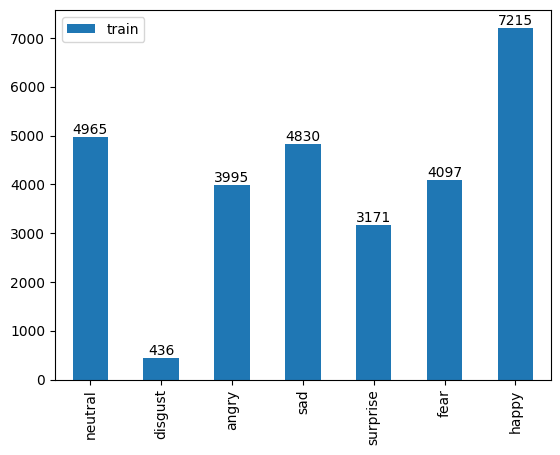

In [27]:
ax=train_count.transpose().plot(kind='bar')
for bars in ax.containers:
  ax.bar_label(bars)

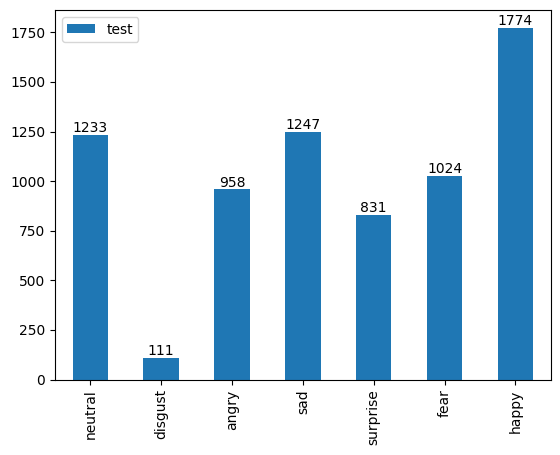

In [28]:
ax=test_count.transpose().plot(kind='bar')
for bars in ax.containers:
  ax.bar_label(bars)

In [29]:
#Plotting one image from each emotion from both training and testing dataset

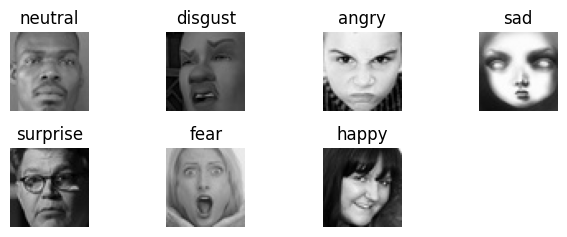

In [30]:
import cv2 as cv
emotion_train=os.listdir(train_dir)
for i,emotion in enumerate(emotion_train):
  emotion_path=os.path.join(train_dir,emotion)
  file_path=os.path.join(emotion_path,os.listdir(emotion_path)[12])
  image=cv.imread(file_path)
  plt.subplot(4,4,i+1)
  plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
  plt.title(emotion)
  plt.axis('off')
  plt.tight_layout()

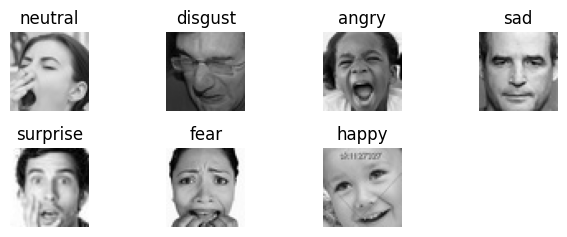

In [31]:
emotion_test=os.listdir(test_dir)
for i,emotion in enumerate(emotion_test):
  emotion_path=os.path.join(test_dir,emotion)
  file_path=os.path.join(emotion_path,os.listdir(emotion_path)[6])
  image=cv.imread(file_path)
  plt.subplot(4,4,i+1)
  plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
  plt.title(emotion)
  plt.axis('off')
  plt.tight_layout()

In [32]:
#Plotting random images from both test and train directories

In [33]:
def plot_image(directory,emotion,num_images=9):
  emotion_path=os.path.join(directory,emotion)
  if len(os.listdir(emotion_path))<num_images:
    print(f'Only {len(os.listdir(emotion_path))} images found in {emotion} foler of the directory')
    num_images=len(os.listdir(emotion_path))
  random_images=np.random.randint(0,len(os.listdir(emotion_path)),num_images)
  fig,ax=plt.subplots(3,3)
  ax=ax.ravel()
  for index,i in enumerate(random_images):
    image_path=os.path.join(emotion_path,os.listdir(emotion_path)[i])
    image=cv.imread(image_path)
    ax[index].imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
    ax[index].axis('off')
  plt.tight_layout()
  plt.show()

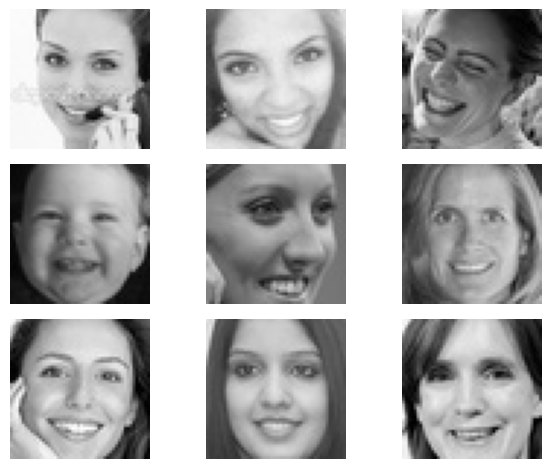

In [34]:

plot_image(train_dir,'happy',9)

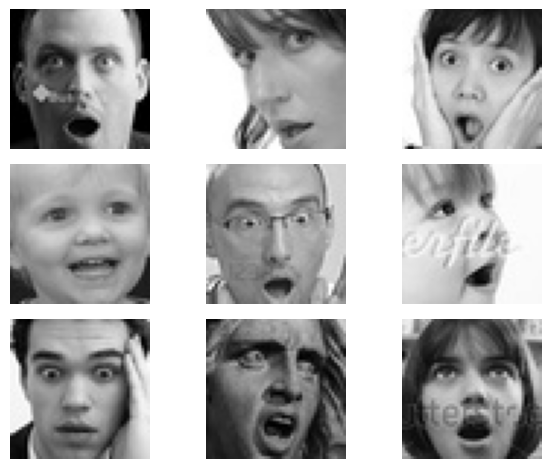

In [35]:
plot_image(test_dir,'surprise')

In [36]:
#Understanding the data

In [37]:
image_path=os.path.join(os.path.join(train_dir,'happy'),os.listdir(os.path.join(train_dir,'happy'))[45])

In [38]:
img=cv.imread(image_path)

array([[[123, 123, 123],
        [113, 113, 113],
        [100, 100, 100],
        ...,
        [ 39,  39,  39],
        [ 60,  60,  60],
        [ 56,  56,  56]],

       [[108, 108, 108],
        [106, 106, 106],
        [101, 101, 101],
        ...,
        [ 38,  38,  38],
        [ 40,  40,  40],
        [ 55,  55,  55]],

       [[104, 104, 104],
        [110, 110, 110],
        [ 94,  94,  94],
        ...,
        [ 49,  49,  49],
        [ 61,  61,  61],
        [ 65,  65,  65]],

       ...,

       [[ 74,  74,  74],
        [ 53,  53,  53],
        [ 40,  40,  40],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  9,   9,   9]],

       [[ 53,  53,  53],
        [ 52,  52,  52],
        [ 35,  35,  35],
        ...,
        [  3,   3,   3],
        [  2,   2,   2],
        [  5,   5,   5]],

       [[ 33,  33,  33],
        [ 23,  23,  23],
        [ 41,  41,  41],
        ...,
        [  4,   4,   4],
        [  0,   0,   0],
        [  1,   1,   1]]], dtype=uint8)
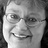

In [39]:
img

array([[123, 113, 100, ...,  39,  60,  56],
       [108, 106, 101, ...,  38,  40,  55],
       [104, 110,  94, ...,  49,  61,  65],
       ...,
       [ 74,  53,  40, ...,   2,   3,   9],
       [ 53,  52,  35, ...,   3,   2,   5],
       [ 33,  23,  41, ...,   4,   0,   1]], dtype=uint8)
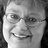

In [40]:
img[:,:,1]

array([[123, 113, 100, ...,  39,  60,  56],
       [108, 106, 101, ...,  38,  40,  55],
       [104, 110,  94, ...,  49,  61,  65],
       ...,
       [ 74,  53,  40, ...,   2,   3,   9],
       [ 53,  52,  35, ...,   3,   2,   5],
       [ 33,  23,  41, ...,   4,   0,   1]], dtype=uint8)
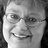

In [41]:
img[:,:,2]

In [42]:
img.shape

(48, 48, 3)

In [43]:
#We have images of size 48x48 and 3 channels

In [44]:
#Model 1 : CNN

In [45]:
num_classes=len(os.listdir(train_dir))

In [46]:
num_classes

7

In [47]:
batch_size=32

In [48]:
os.makedirs(os.path.join(project,'Model 1'))

In [49]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,roc_curve,auc
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam,Adamax,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

In [50]:
data_generator=ImageDataGenerator(rescale=1./255,validation_split=0.1)

In [51]:
train_data_generator=data_generator.flow_from_directory(train_dir,target_size=(48,48),batch_size=batch_size,class_mode='categorical',color_mode='grayscale',subset='training')

Found 25841 images belonging to 7 classes.


In [52]:
validation_data_generator=data_generator.flow_from_directory(train_dir,target_size=(48,48),batch_size=32,class_mode='categorical',color_mode='grayscale',subset='validation')

Found 2868 images belonging to 7 classes.


In [53]:
test_data_generator=data_generator.flow_from_directory(test_dir,target_size=(48,48),batch_size=batch_size,color_mode='grayscale',class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [54]:
#Printing Class Labels

In [55]:
train_class_labels=train_data_generator.class_indices

In [56]:
train_class_labels

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [57]:
validation_class_labels=validation_data_generator.class_indices

In [58]:
validation_class_labels

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [59]:
test_class_labels=test_data_generator.class_indices

In [60]:
test_class_labels

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [61]:
#Model Generation

In [62]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(48,48,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(Conv2D(512,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(7,activation='softmax'))

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

In [64]:
from keras.utils import plot_model

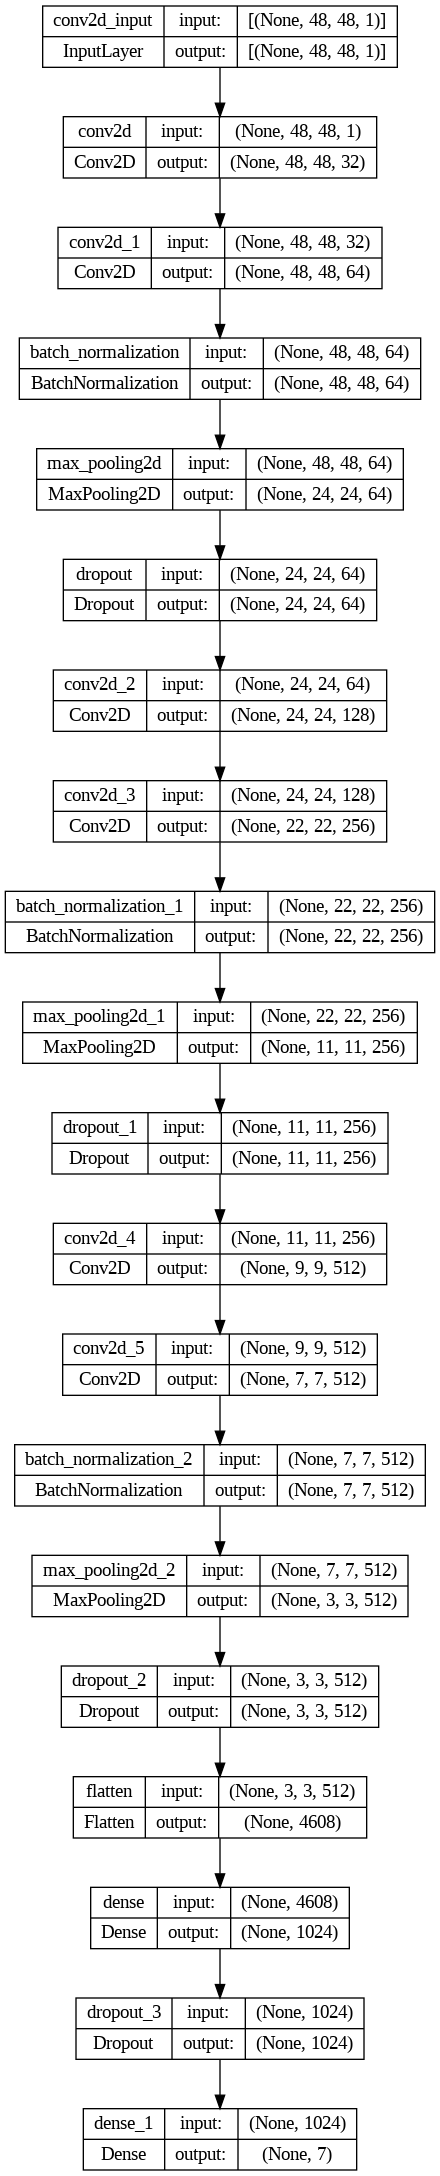

In [65]:
plot_model(model,to_file='/content/Emotion/Model 1/architecture.png',show_shapes=True,show_layer_names=True)

In [66]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [67]:
train_data_generator.samples

25841

In [68]:
#Understanding the steps in each epoch

In [69]:
training_steps=train_data_generator.samples/32 +1

In [70]:
training_steps

808.53125

In [71]:
validation_steps=validation_data_generator.samples/32 +1


In [72]:
validation_steps

90.625

In [73]:
checkpoint=os.path.join('/content/Emotion/Model 1','Model.keras')

In [74]:
#Callbacks

In [75]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,CSVLogger,ReduceLROnPlateau,TensorBoard

In [76]:
cp=ModelCheckpoint(filepath=checkpoint,save_best_only=True,monitor='val_loss',mode='min',verbose=1)

In [77]:
es=EarlyStopping(monitor='val_loss',patience=5,min_delta=0)

In [78]:
lr=ReduceLROnPlateau(monitor='val_loss',min_delta=0.0001,patience=5,factor=0.2)

In [79]:
#c=CSVLogger('/content/Emotion/Model 1','training.log')

In [80]:
cb=[cp,es,lr]

In [81]:
hist_model1=model.fit(train_data_generator,epochs=10,validation_data=validation_data_generator,callbacks=cb)

Epoch 1/10
807/808 [============================>.] - ETA: 0s - loss: 4.5020 - accuracy: 0.3288
Epoch 1: val_loss improved from inf to 2.43352, saving model to /content/Emotion/Model 1/Model.keras
808/808 [==============================] - 51s 42ms/step - loss: 4.4985 - accuracy: 0.3290 - val_loss: 2.4335 - val_accuracy: 0.3372 - lr: 0.0010
Epoch 2/10
807/808 [============================>.] - ETA: 0s - loss: 1.7458 - accuracy: 0.4272
Epoch 2: val_loss improved from 2.43352 to 1.70830, saving model to /content/Emotion/Model 1/Model.keras
808/808 [==============================] - 35s 44ms/step - loss: 1.7462 - accuracy: 0.4271 - val_loss: 1.7083 - val_accuracy: 0.4460 - lr: 0.0010
Epoch 3/10
808/808 [==============================] - ETA: 0s - loss: 1.6263 - accuracy: 0.4646
Epoch 3: val_loss improved from 1.70830 to 1.59555, saving model to /content/Emotion/Model 1/Model.keras
808/808 [==============================] - 36s 44ms/step - loss: 1.6263 - accuracy: 0.4646 - val_loss: 1.5955

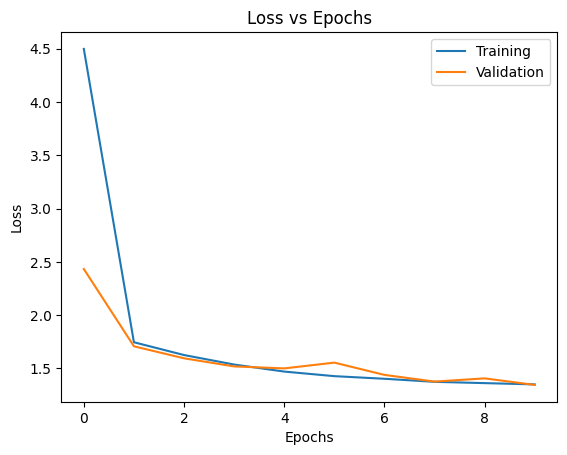

In [82]:
plt.plot(hist_model1.history['loss'],label='Training')
plt.plot(hist_model1.history['val_loss'],label='Validation')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

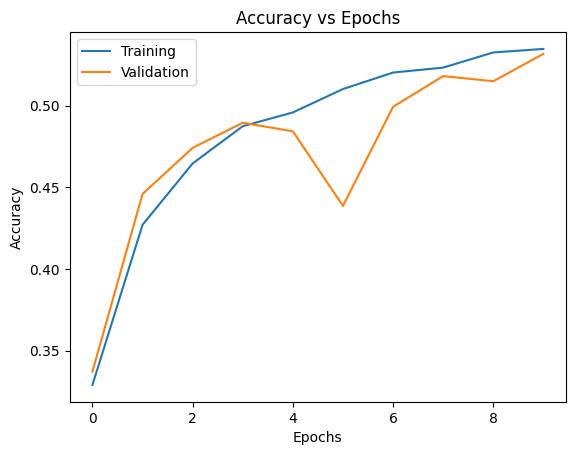

In [83]:
plt.plot(hist_model1.history['accuracy'],label='Training')
plt.plot(hist_model1.history['val_accuracy'],label='Validation')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
train_loss,train_accuracy=model.evaluate(train_data_generator)
test_loss,test_accuracy=model.evaluate(test_data_generator)

225/225 [==============================] - 5s 21ms/step - loss: 1.3390 - accuracy: 0.5361


In [85]:
#Plotting a Confusion Matrix

In [86]:
true_classes=test_data_generator.classes

In [87]:
predicted_classes=np.argmax(model.predict(test_data_generator),axis=1)

225/225 [==============================] - 5s 22ms/step


In [88]:
class_labels=list(test_data_generator.class_indices.keys())

In [89]:
len(true_classes)

7178

In [90]:
predicted_classes

array([5, 5, 5, ..., 4, 3, 3])

In [91]:
cm=confusion_matrix(true_classes,predicted_classes)

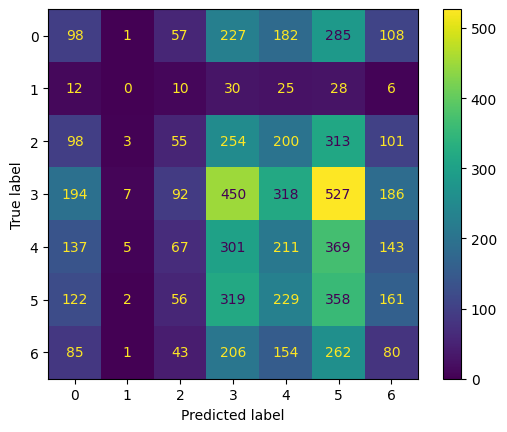

In [92]:
ConfusionMatrixDisplay(cm).plot()

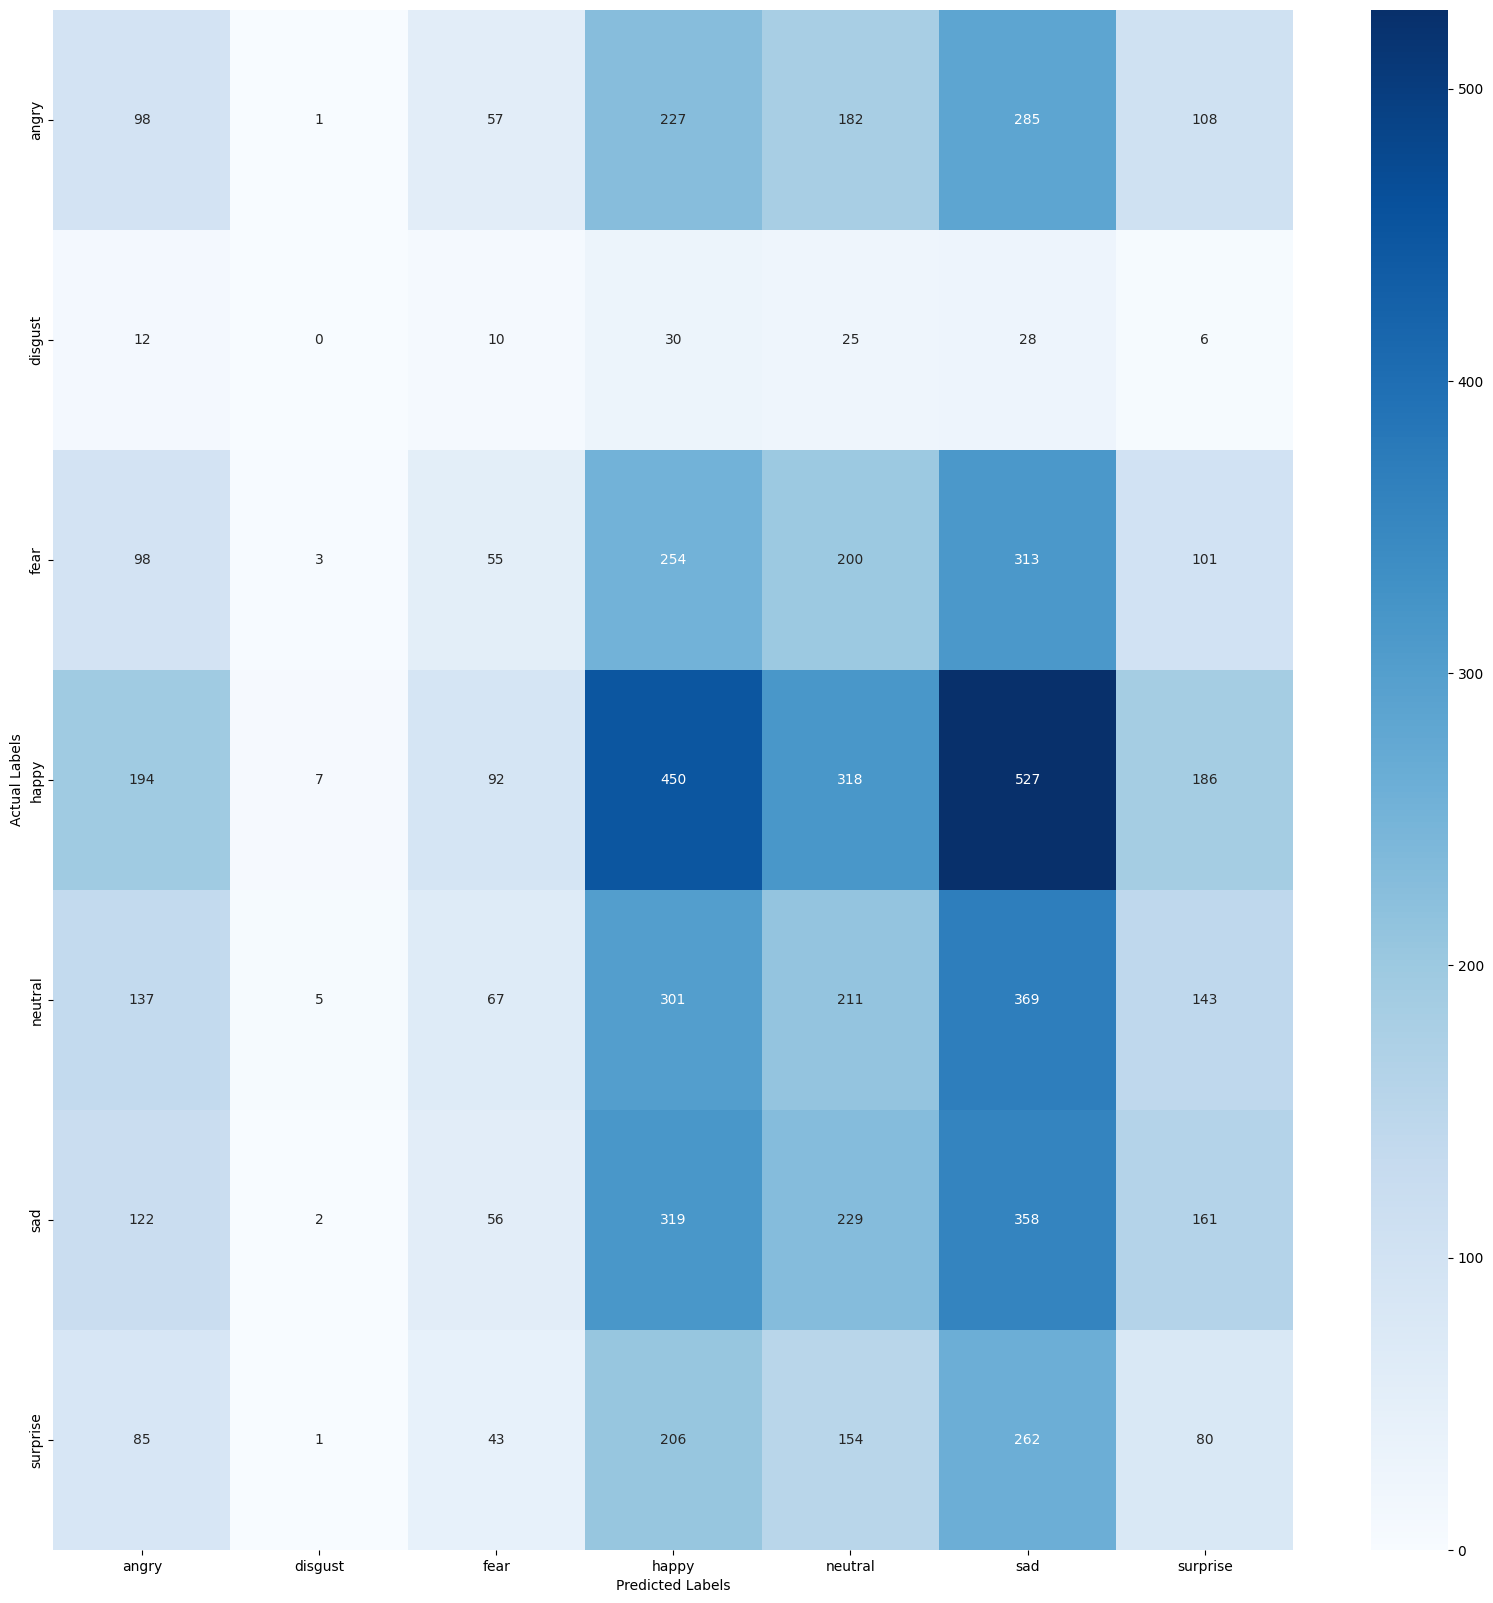

In [93]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=class_labels,yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [94]:
from sklearn.metrics import classification_report

In [95]:

report=classification_report(true_classes,predicted_classes,target_names=class_labels,zero_division=0)
report

'              precision    recall  f1-score   support\n\n       angry       0.13      0.10      0.12       958\n     disgust       0.00      0.00      0.00       111\n        fear       0.14      0.05      0.08      1024\n       happy       0.25      0.25      0.25      1774\n     neutral       0.16      0.17      0.17      1233\n         sad       0.17      0.29      0.21      1247\n    surprise       0.10      0.10      0.10       831\n\n    accuracy                           0.17      7178\n   macro avg       0.14      0.14      0.13      7178\nweighted avg       0.17      0.17      0.17      7178\n'

In [96]:

#Making Predictions

In [97]:
labels=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

In [98]:
batch_size=32

1/1 [==============================] - 0s 29ms/step


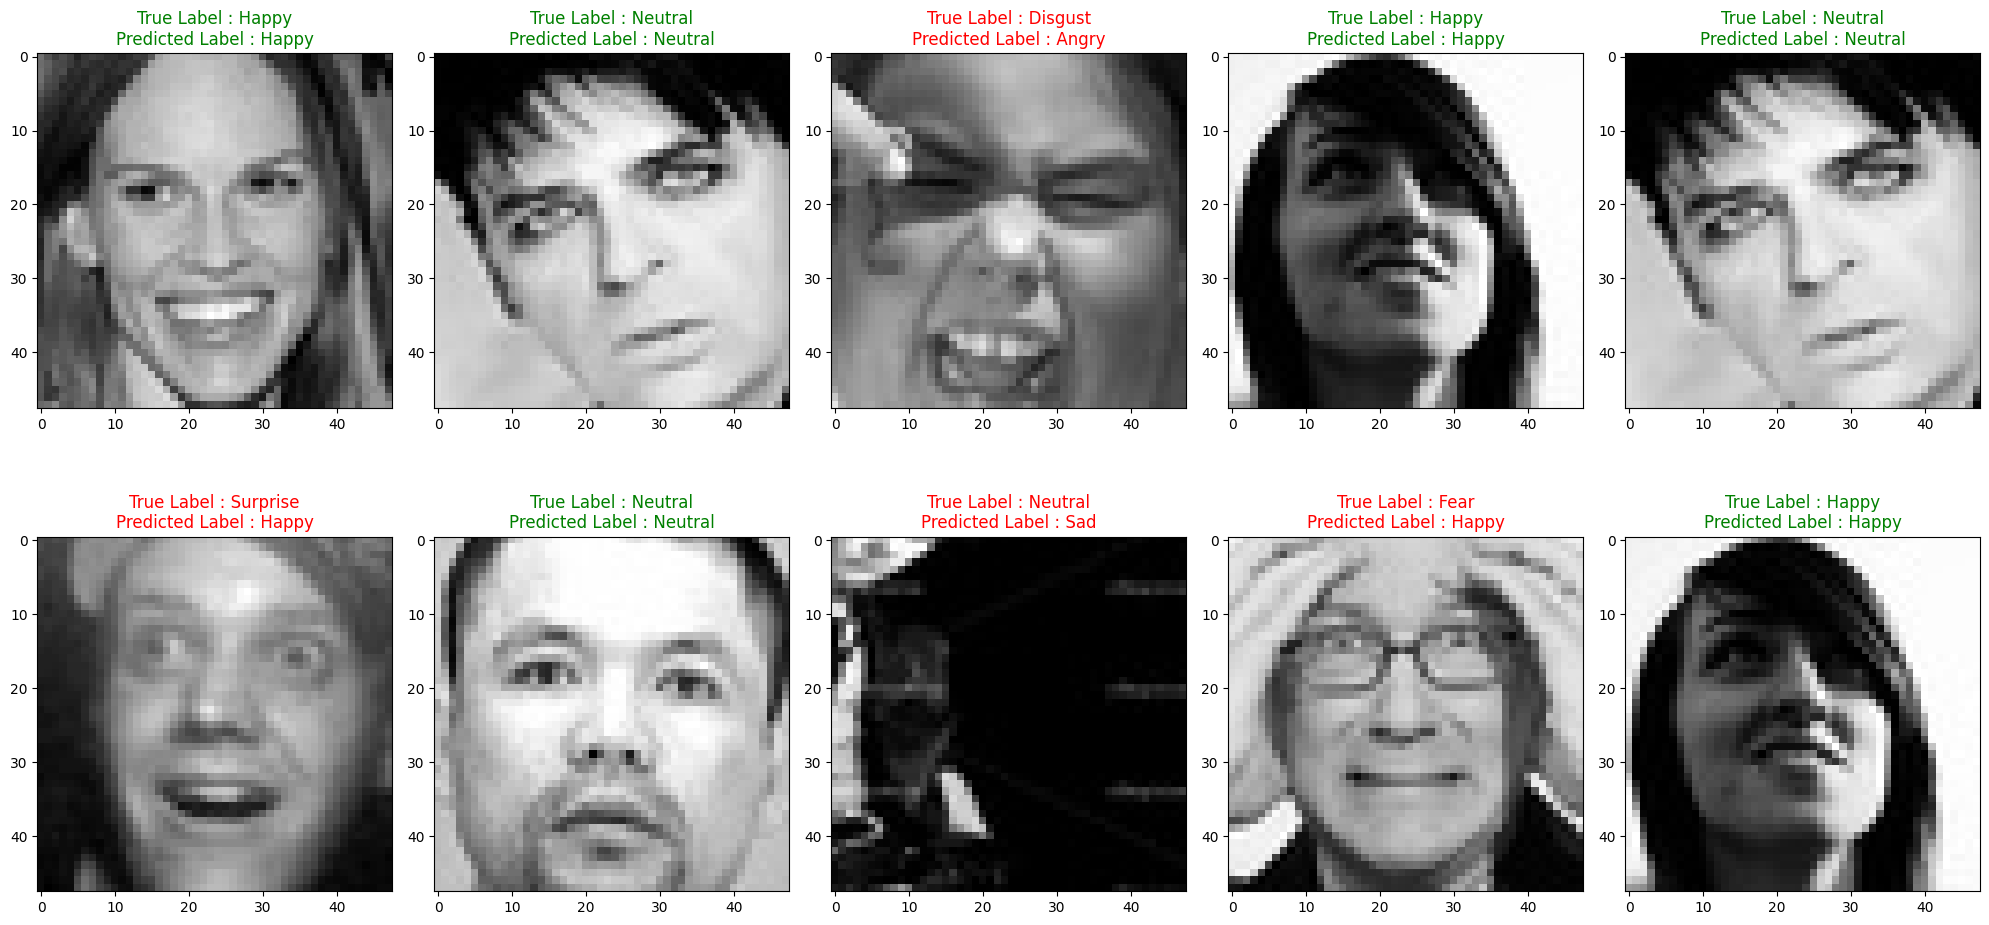

In [99]:
random_batch=np.random.randint(0,len(test_data_generator)-1)
random_img_index=np.random.randint(0,32,10)
fig,axes=plt.subplots(2,5,figsize=(20,10))

for index,ax in enumerate(axes.flat):
  random_img=test_data_generator[random_batch][0][random_img_index][index]
  random_image_label=np.argmax(test_data_generator[random_batch][1][random_img_index][index],axis=0)
  pred=np.argmax(model.predict(tf.expand_dims(random_img,axis=0),verbose=1),axis=1)[0]
  ax.imshow(random_img.squeeze(),cmap='gray')
  color='green' if labels[random_image_label]==labels[pred] else 'red'
  ax.set_title(f'True Label : {labels[random_image_label]}\nPredicted Label : {labels[pred]}',color=color )
plt.tight_layout()
plt.show()

In [100]:
#Training Model 2 With Data Augmentation

In [101]:
train_dir

'/content/fer2013/train'

In [102]:
test_dir

'/content/fer2013/test'

In [103]:
image_width,image_height=48,48
batch_size=32
epochs=50
num_classes=7

In [104]:
train_gen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.25,fill_mode='nearest',horizontal_flip=True,shear_range=0.2,validation_split=0.2)

In [105]:
test_gen=ImageDataGenerator(rescale=1./255)

In [106]:
training_data=train_gen.flow_from_directory(train_dir,target_size=(48,48),batch_size=32,color_mode='grayscale',class_mode='categorical',subset='training')

Found 22968 images belonging to 7 classes.


In [107]:
test_data=test_gen.flow_from_directory(test_dir,target_size=(48,48),batch_size=32,color_mode='grayscale',class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [108]:
validation_data=train_gen.flow_from_directory(train_dir,target_size=(48,48),batch_size=32,color_mode='grayscale',class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [109]:
#Printing Augmented Images

In [110]:
testing_image='/content/fer2013/test/disgust/PrivateTest_11895083.jpg'

In [111]:
from PIL import Image

In [112]:
image=Image.open(testing_image)

In [113]:
img_arr=np.array(image)

In [114]:
img_arr=img_arr.reshape((1,)+img_arr.shape+(1,))

In [115]:
img_arr.shape

(1, 48, 48, 1)

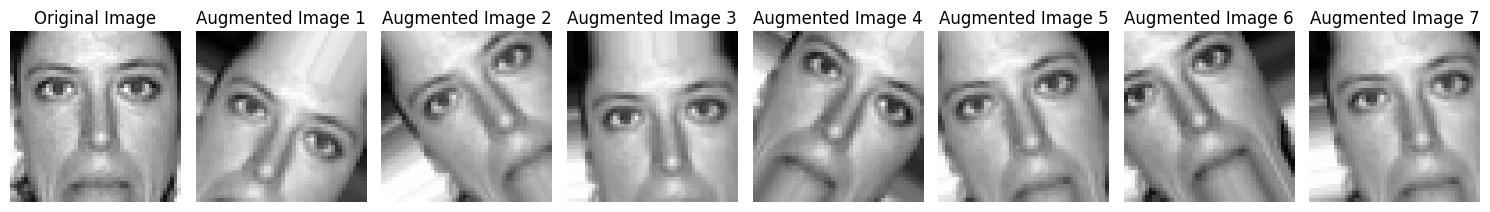

In [116]:
fig,axes=plt.subplots(1,8,figsize=(15,5))
axes[0].imshow(img_arr[0,:,:,0],cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

for index,ax in enumerate(axes.flat[1:]):
  aug_index=train_gen.flow(img_arr,batch_size=1)
  aug_img=next(aug_index)[0]
  ax.imshow(aug_img[:,:],cmap='gray')
  ax.set_title(f'Augmented Image {index+1}')
  ax.axis('off')

plt.tight_layout()
plt.show()

In [117]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(48,48,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(Conv2D(512,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(7,activation='softmax'))

In [118]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [119]:
dir='/content/Emotion'

In [120]:
m2_path=os.path.join(dir,'Model 2')

In [121]:
os.makedirs(m2_path)

In [122]:
name='CNN_Model_with_Augmentaion.keras'

In [123]:
checkpoint=os.path.join(m2_path,name)

In [124]:
cp2=ModelCheckpoint(filepath=checkpoint,mode='min',monitor='val_loss',verbose=1,save_best_only=True)
es2=EarlyStopping(patience=5,min_delta=0,monitor='val_loss',restore_best_weights=True,verbose=1)
lr2=ReduceLROnPlateau(min_delta=0,factor=0.2,monitor='val_loss',patience=5,verbose=1)

In [125]:
cb2=[cp2,es2,lr2]

In [126]:
hist_model2=model.fit(training_data,validation_data=validation_data,epochs=100,callbacks=cb2)

Epoch 1/100
718/718 [==============================] - ETA: 0s - loss: 4.8068 - accuracy: 0.2309
Epoch 1: val_loss improved from inf to 2.10966, saving model to /content/Emotion/Model 2/CNN_Model_with_Augmentaion.keras
718/718 [==============================] - 90s 118ms/step - loss: 4.8068 - accuracy: 0.2309 - val_loss: 2.1097 - val_accuracy: 0.2517 - lr: 0.0010
Epoch 2/100
718/718 [==============================] - ETA: 0s - loss: 1.9807 - accuracy: 0.2432
Epoch 2: val_loss improved from 2.10966 to 2.06435, saving model to /content/Emotion/Model 2/CNN_Model_with_Augmentaion.keras
718/718 [==============================] - 85s 119ms/step - loss: 1.9807 - accuracy: 0.2432 - val_loss: 2.0644 - val_accuracy: 0.2507 - lr: 0.0010
Epoch 3/100
718/718 [==============================] - ETA: 0s - loss: 1.9121 - accuracy: 0.2456
Epoch 3: val_loss improved from 2.06435 to 1.87972, saving model to /content/Emotion/Model 2/CNN_Model_with_Augmentaion.keras
718/718 [==============================] 

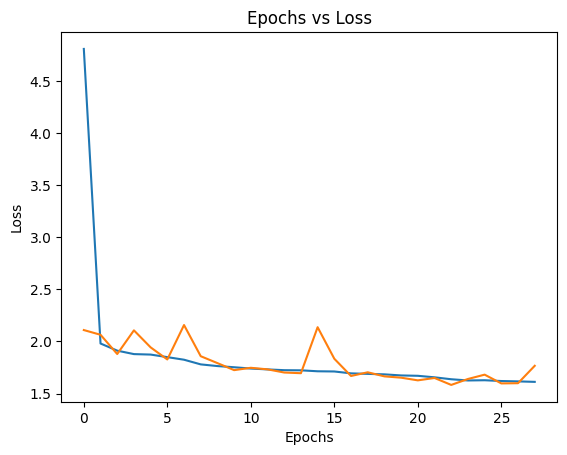

In [127]:
plt.plot(hist_model2.history['loss'],label='Training')
plt.plot(hist_model2.history['val_loss'],label='Validation')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

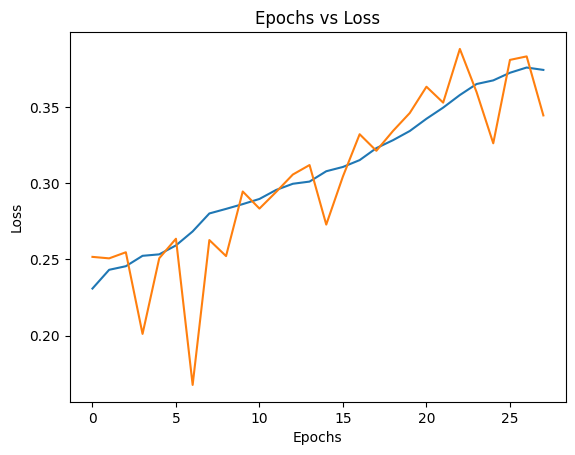

In [128]:
plt.plot(hist_model2.history['accuracy'],label='Training')
plt.plot(hist_model2.history['val_accuracy'],label='Validation')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [129]:
train_loss,train_accuracy=model.evaluate(training_data)
test_loss,test_accuracy=model.evaluate(test_data)

225/225 [==============================] - 3s 13ms/step - loss: 1.5171 - accuracy: 0.4159


In [130]:
train_loss

1.5850441455841064

In [131]:
test_loss

1.5171483755111694

In [132]:
true_classes=test_data.classes

In [133]:
predicted_classes=np.argmax(model.predict(test_data),axis=1)

225/225 [==============================] - 3s 11ms/step


In [134]:
cm2=confusion_matrix(true_classes,predicted_classes)

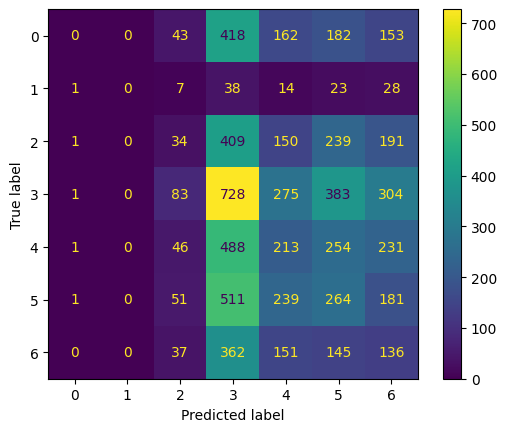

In [135]:
ConfusionMatrixDisplay(cm2).plot()

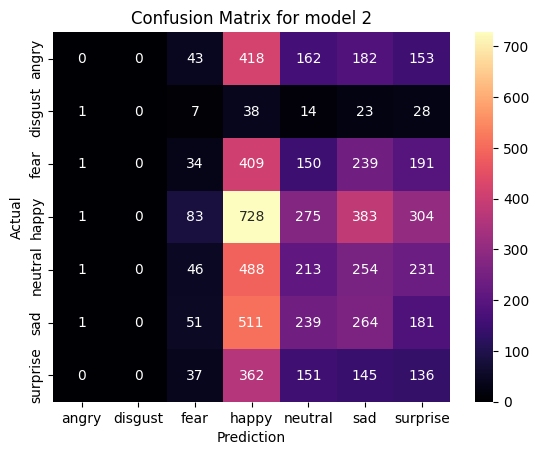

In [136]:
sns.heatmap(cm2,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels,cmap='magma')
plt.title('Confusion Matrix for model 2')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [137]:
report=classification_report(true_classes,predicted_classes,target_names=class_labels,zero_division=0)

In [138]:
report

'              precision    recall  f1-score   support\n\n       angry       0.00      0.00      0.00       958\n     disgust       0.00      0.00      0.00       111\n        fear       0.11      0.03      0.05      1024\n       happy       0.25      0.41      0.31      1774\n     neutral       0.18      0.17      0.17      1233\n         sad       0.18      0.21      0.19      1247\n    surprise       0.11      0.16      0.13       831\n\n    accuracy                           0.19      7178\n   macro avg       0.12      0.14      0.12      7178\nweighted avg       0.15      0.19      0.16      7178\n'

In [139]:
#Model Prediction

In [140]:
batch_size=32

In [142]:
random_batch=np.random.randint(0,len(test_data)-1)

In [143]:
random_image_index=np.random.randint(0,batch_size,10)

1/1 [==============================] - 0s 60ms/step


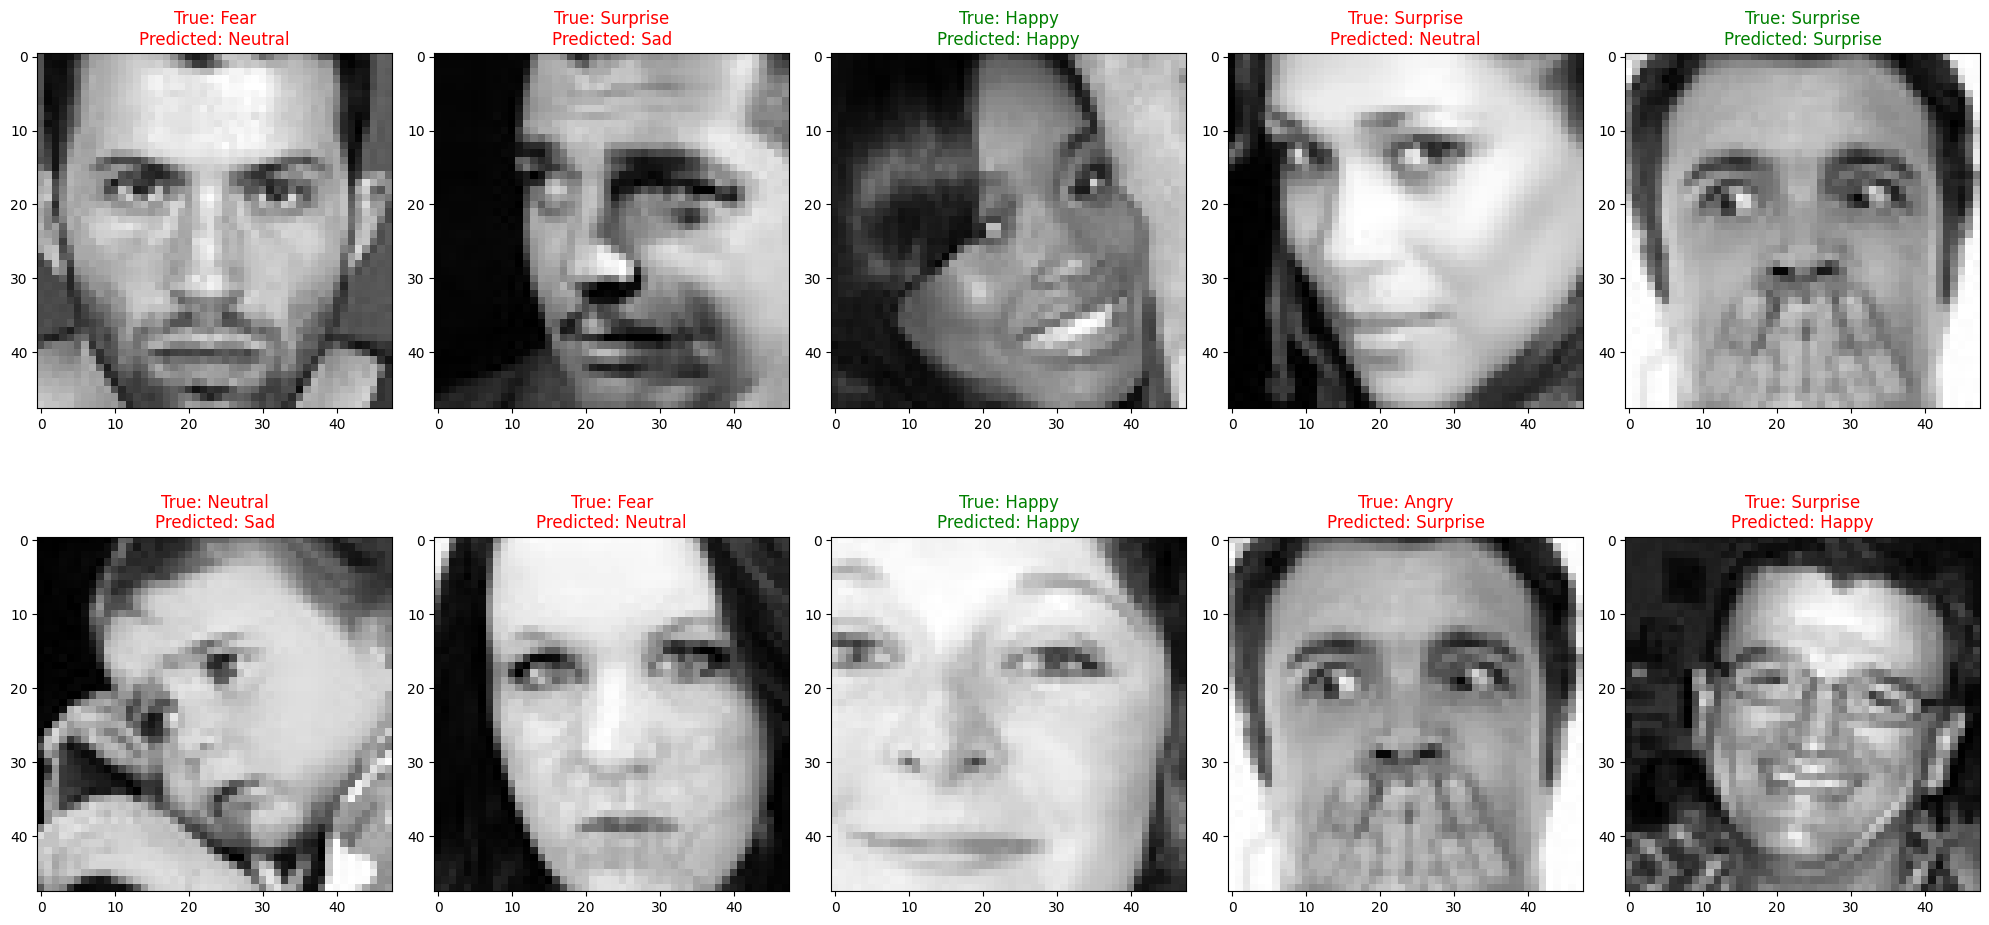

In [147]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for ax, i in zip(axes.flat, range(10)):
    rand_img = test_data[random_batch][0][random_image_index[i]]
    rand_img_label = np.argmax(test_data[random_batch][1][random_img_index[i]])
    pred = np.argmax(model.predict(tf.expand_dims(rand_img, axis=0), verbose=1), axis=1)[0]
    ax.imshow(rand_img.squeeze(), cmap='gray')
    color = 'green' if labels[rand_img_label] == labels[pred] else 'red'
    ax.set_title(f'True: {labels[rand_img_label]}\nPredicted: {labels[pred]}', color=color)

plt.tight_layout()
plt.show()


In [148]:
#Model 3 - Transfer Learning VGG16

In [149]:
training_data_generator=ImageDataGenerator(rescale=1./255,rotation_range=10,zoom_range=0.3,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,fill_mode='nearest')

In [150]:
testing_data_generator=ImageDataGenerator(rescale=1./255)

In [153]:
training_data=training_data_generator.flow_from_directory(train_dir,class_mode='categorical',color_mode='rgb',subset='training',shuffle=True,batch_size=64,target_size=(224,224))

Found 28709 images belonging to 7 classes.


In [154]:
testing_data=testing_data_generator.flow_from_directory(test_dir,target_size=(224,224),batch_size=64,class_mode='categorical',color_mode='rgb')

Found 7178 images belonging to 7 classes.


In [155]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [157]:
from tensorflow.keras.applications import VGG16
vgg=VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
vgg.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [158]:
for layers in vgg.layers[:-3]:
  layers.trainable=False

In [159]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [160]:
x=Flatten()(vgg.output)
x=Dense(1024,activation='relu',kernel_initializer='he_normal')(x)
x=Dropout(0.5)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.5)(x)
output=Dense(7,activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=output)

In [161]:
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False),metrics=['accuracy'])

In [162]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [165]:
os.makedirs(os.path.join('/content/Emotion','Model 3'))

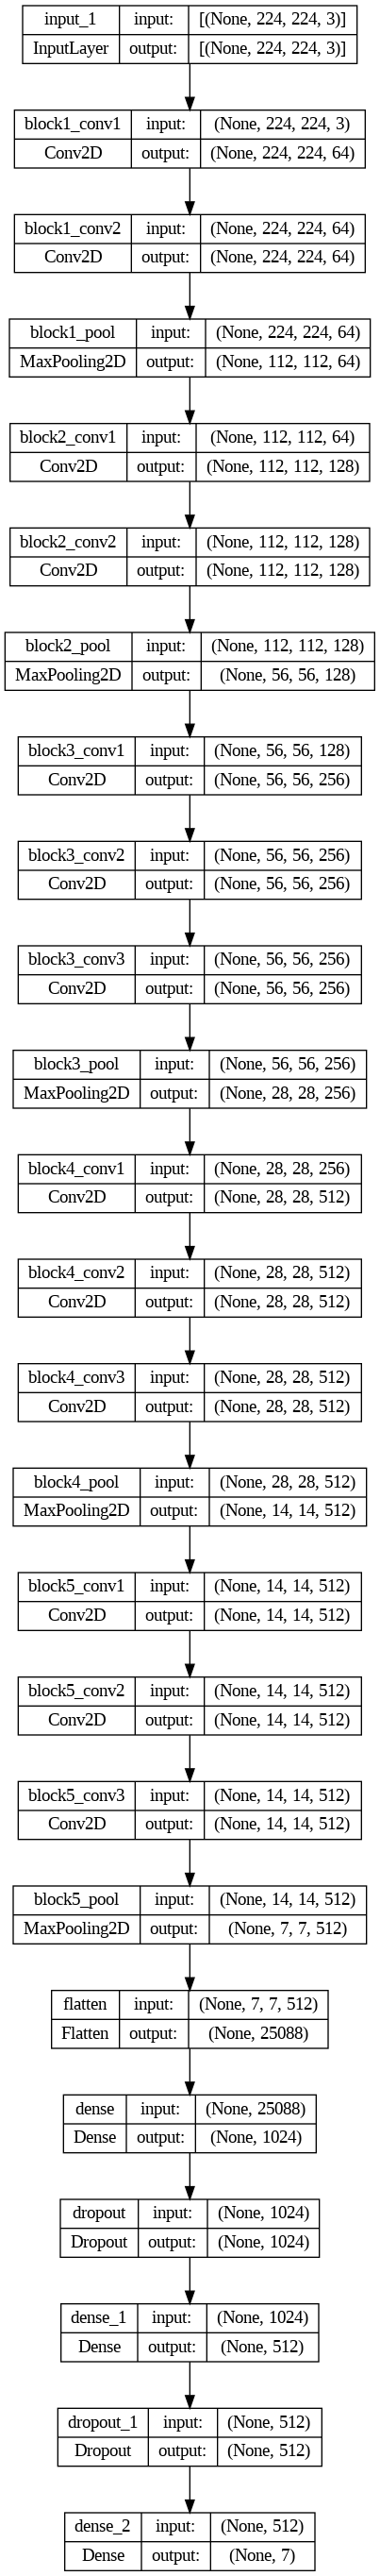

In [166]:
plot_model(model,to_file='/content/Emotion/Model 3/architecture.png',show_shapes=True,show_layer_names=True)

In [167]:
path='/content/Emotion/Model 3'

In [168]:
name='VGG16_TL.keras'

In [169]:
checkpoint=os.path.join(path,name)

In [170]:
cp3=ModelCheckpoint(filepath=checkpoint,save_best_only=True,verbose=1,mode='min',monitor='val_loss')

In [171]:
es3=EarlyStopping(monitor='val_loss',patience=5,verbose=1,restore_best_weights=True,min_delta=0)

In [172]:
lr3=ReduceLROnPlateau(verbose=1,min_delta=0,factor=0.2,patience=5,monitor='val_loss')

In [173]:
cb3=[cp3,es3,lr3]

In [175]:
hist_model3=model.fit(training_data,validation_data=test_data,callbacks=cb3,epochs=10)

Epoch 1/10
449/449 [==============================] - ETA: 0s - loss: 1.5584 - accuracy: 0.3974

InvalidArgumentError: Graph execution error:

Detected at node model/block1_conv1/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-175-5dc7bb029b31>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1856, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

input depth must be evenly divisible by filter depth: 1 vs 3
	 [[{{node model/block1_conv1/Relu}}]] [Op:__inference_test_function_246958]

In [ ]:
plt.plot(hist_model3.history['loss'],label='Training')
plt.plot(hist_model3.history['val_loss'],label='Testing')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(hist_model3.history['accuracy'],label='Training')
plt.plot(hist_model3.history['val_accuracy'],label='Testing')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
train_loss,train_accuracy=model.evaluate(training_data)
test_loss,test_accuracy=model.evaluate(testing_data)

In [ ]:
train_loss

In [ ]:
test_loss

In [ ]:
true_classes=testing_data.classes

In [ ]:
predicted_classes=np.argmax(model.evaluate(testing_data),axis=1)

In [ ]:
cm3=confusion_matrix(true_classes,predicted_classes)

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)
plt.title('Confusion Matrix for VGG16')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
report=classification_report(true_classes,predicted_classes)

In [ ]:
image_path='/content/fer2013/train/neutral/Training_10059941.jpg'

In [ ]:
image=Image.open(image_path)

In [ ]:
image.shape

In [ ]:
image=cv.resize(image,(224,224))

In [ ]:
image=cv.cvtColor(image,cv.COLOR_GRAY2RGB)

In [ ]:
prediction=np.argmax(model.evaluate(image))

In [ ]:
x=list(training_data.class_indices.keys())[prediction]

In [ ]:
plt.imshow(image)
plt.title(f'True Label : Neutral \nPredicted Label : {x}')

In [ ]:
#Model - 4  Transfer Learning RESNET

In [ ]:
train_generator=ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_scale=0.2,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2)

In [ ]:
test_generator=ImageDataGenerator(rescale=1/255)

In [ ]:
training_data=train_generator.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,color_mode='rgb',class_mode='categorical')

In [ ]:
testing_data=test_generator.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode='categorical',color_mode='rgb')

In [ ]:
fromtensorflow.keras.applications import ResNet50V2

In [ ]:
base_model=ResNet50V2(weights='imagenet',input_shape=(224,224,3))

In [ ]:
model=Sequential([base_model,BatchNormalization(),GlobalAveragePooling2D(),Dense(512,activation='relu'),Dropout(0.2),Dense(256,activation='relu'),Dropout(0.5),Dense(128,activation='relu'),Dropout(0.2),Dense(7,activation='softmax')])

In [ ]:
optimizer=tensorflow.keras.optimizers.Adamax(learning_rate=0.0001)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
plot_model(model,to_file='/content/Emotion/Model 4/model4_architecture.png',show_shapes=True,show_layer_names=True)

In [ ]:
path='/content/Emotion/Model 4'

In [ ]:
name='ResNet.keras'

In [ ]:
model_path=os.path.join(path,name)

In [ ]:
cp4=ModelCheckpoint(filepath=model_path,verbose=1,mode='min',monitor='val_loss',save_best_only=True)

In [ ]:
es4=EarlyStopping(patience=5,min_delta=0,monitor='val_loss',verbose=1,restore_best_weights=True)

In [ ]:
lr4=ReduceLROnPlateau(patience=5,verbose=1,monitor='val_loss',factor=0.2,min_delta=0.0001)

In [ ]:
cb4=[cp4,es4,lr4]

In [ ]:
hist_model4=model.fit(training_data,epochs=100,callbacks=cb4,validation_data=testing_data)

In [ ]:
plt.plot(hist_model4.history['loss'],label='Training')
plt.plot(hist_model4.history['val_loss'],label='Testing')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(hist_model4.history['accuracy'],label='Training')
plt.plot(hist_model4.history['val_accuracy'],label='Testing')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend()
plt.show()

In [ ]:
train_loss,train_accuracy=model.evaluate(training_data)

In [ ]:
train_loss

In [ ]:
test_loss,test_accuracy=model.evaluate(testing_data)

In [ ]:
test_loss

In [ ]:
true_classes=testing_data.classes

In [ ]:
predicted_classes=np.argmax(model.evaluate(testing_data),axis=1)

In [ ]:
cm4=confusion_matrix(true_classes,predicted_classes)

In [ ]:
ConfusionMatrixDisplay(cm).plot()

In [ ]:
labels=list(training_data.class_indices.keys())

In [ ]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
report=classification_report(true_classes,predicted_classes,target_names=labels,zero_division=0)

In [ ]:
report

In [ ]:
test_image='/content/fer2013/train/neutral/Training_10031781.jpg'

In [ ]:
image=Image.open(test_image)

In [ ]:
image.shape

In [ ]:
image=cv.resize(image,(224,224))

In [ ]:
image=cv2.cvtColor(image,cv.COLOR_GRAY2RGB)

In [ ]:
label=np.argmax(model.evaluate(image))
x=labels[label]

In [ ]:
plt.imshow(image)
plt.title(f'Actual Label : Neutral \nPredicted Label : {x}')
plt.show()